In [2]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 디렉토리 설정
source_root = r"C:\Users\USER\Desktop\47.물류공간 예측 데이터\3.개방데이터\1.데이터\Validation\01.원천데이터"
label_root  = r"C:\Users\USER\Desktop\47.물류공간 예측 데이터\3.개방데이터\1.데이터\Validation\02.라벨링데이터"

In [4]:
# 1. 모든 이미지 파일 경로 인덱싱
print("🔍 이미지 파일 인덱싱 중...")
img_map = {}  # {파일명: 전체 경로}
for dirpath, _, filenames in os.walk(source_root):
    for fname in filenames:
        if fname.endswith('.jpg'):
            img_map[fname] = os.path.join(dirpath, fname)

print(f"✅ 총 이미지 파일 수: {len(img_map)}")

🔍 이미지 파일 인덱싱 중...
✅ 총 이미지 파일 수: 12226


In [5]:
# 2. 모든 JSON에서 이미지 이름 읽고 매칭
pairs = []

for dirpath, _, filenames in os.walk(label_root):
    for fname in filenames:
        if fname.endswith('.json'):
            json_path = os.path.join(dirpath, fname)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                file_name = data['images'][0]['file_name']  # <- 이미지 파일명

                if file_name in img_map:
                    pairs.append((img_map[file_name], json_path))
                else:
                    print(f"[❌] 이미지 없음: {file_name}")
            except Exception as e:
                print(f"[⚠️] JSON 처리 오류: {json_path} / {e}")

print(f"\n✅ 최종 매칭된 이미지-라벨 쌍: {len(pairs)}개")


✅ 최종 매칭된 이미지-라벨 쌍: 12238개


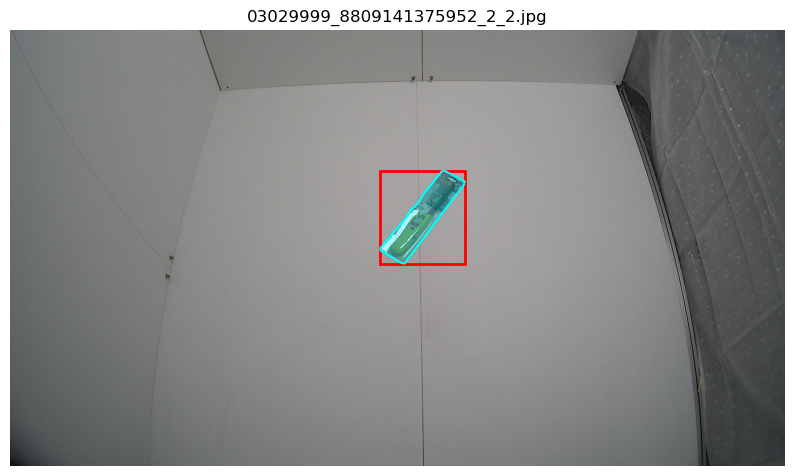

In [24]:
# 3. 첫 예시 시각화
if pairs:
    img_path, json_path = pairs[2178]
    image = Image.open(img_path)

    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    annotation = data['annotations'][0]
    bbox = annotation['bbox']
    seg = np.array(annotation['segmentation'][0], dtype=np.int32).reshape(-1, 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title(data['images'][0]['file_name'])

    # bbox
    x, y, w, h = bbox
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', fill=False, linewidth=2))

    # segmentation
    plt.plot(seg[:, 0], seg[:, 1], color='cyan')
    plt.fill(seg[:, 0], seg[:, 1], color='cyan', alpha=0.3)

    plt.axis('off')
    plt.show()